<div style="color: #2590c2; text-align: center;">
<span style="font-size:18pt;"><b>ST: BIG DATA ANALYTICS</b></span><br/>
<span>CS 696-16 (Fall'18)</span><br/><br/>
<span><b>Project 1</b></span><br/><br/>
<span>Submitted By</span><br/>
<span>Ashok Kumar Shrestha</span>
</div>

In [ ]:
# Datasets from Kaggle
# Challenges in Representation Learning: Facial Expression Recognition Challenge
# source: https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

In [7]:
import csv, sys
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

def load_facedata():
    filename = 'fer2013.csv'
    cnt = 0
    data = []
    label = []
    w, h = 48, 48
    image = np.zeros((h, w), dtype=np.uint8)
    
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        try:
            for row in reader:
                cnt += 1
                if cnt>1:
                    emotion = int(row[0]) - 1
                    pixels = list(map(int, row[1].split()))
                    pixels_array = np.asarray(pixels)
                    
                    data.append(pixels_array)
                    label.append(emotion)
                    #if cnt>10:
                    #    return data1, label
        
            return data, label
    
        except csv.Error as e:
            sys.exit('file %s, line %d: %s' % (filename, reader.line_num, e))


def face_data():
    data, label = load_facedata()

    X = np.array(data)[:]
    y = np.asarray(label)[:]

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    return (X_train, Y_train), (X_test, Y_test)

Starting Network...
-------------------------------------------------------
Reading Data sets...
Face data loaded.
-------------------------------------------------------
Begin Training...
Epoch 1/10
100/100 [==============================] - 2s 17ms/step - loss: 2.3044 - acc: 0.0200
Epoch 2/10
100/100 [==============================] - 1s 10ms/step - loss: 1.9065 - acc: 0.3200
Epoch 3/10
100/100 [==============================] - 1s 9ms/step - loss: 1.8359 - acc: 0.1900
Epoch 4/10
100/100 [==============================] - 1s 9ms/step - loss: 1.7074 - acc: 0.3200
Epoch 5/10
100/100 [==============================] - 1s 9ms/step - loss: 1.7862 - acc: 0.3200
Epoch 6/10
100/100 [==============================] - 1s 9ms/step - loss: 1.7318 - acc: 0.4100
Epoch 7/10
100/100 [==============================] - 1s 10ms/step - loss: 1.7054 - acc: 0.2600
Epoch 8/10
100/100 [==============================] - 1s 11ms/step - loss: 1.5978 - acc: 0.4400
Epoch 9/10
100/100 [===========================

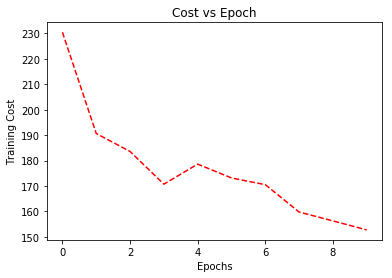

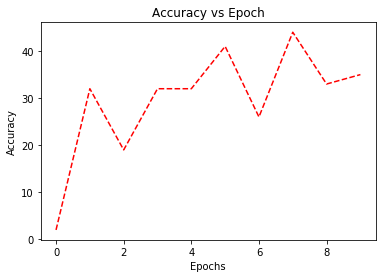

In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.utils import np_utils
from keras.datasets import mnist
from keras.datasets import cifar10
from keras import backend as K
K.set_image_dim_ordering('th')
import matplotlib.pyplot as plt

def show_graph(epoch, history, title="Cost vs Epoch",xlabel="Epochs",ylabel="Training Cost",image_name="cost_vs_epochs.png"):
        epochs = range(epoch)
        
        epochs = np.reshape(epochs,(-1,1))
        history = np.reshape(history,(-1,1)) *100
        
        plt.plot(epochs, history,"r--")
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.savefig(image_name)
        plt.show()

def read_data(file="mnist"):
    if file=="mnist":
        (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
        c = 1
        w,h = X_train.shape[1:]
        print("MNIST data loaded.")
    elif file=="cifar10":
        (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
        c,w,h = X_train.shape[1:]
        print("CIFAR data loaded.")
    elif file=="face_data":
        (X_train, Y_train), (X_test, Y_test) = face_data()
        c,w,h = 1,48,48
        X_train = X_train.reshape(X_train.shape[0], c, w, h)
        X_test = X_test.reshape(X_test.shape[0], c, w, h)
        #c,w,h = X_train.shape[1:]
        print("Face data loaded.")
    
    X_train = X_train.reshape(X_train.shape[0], c,w,h)
    X_test = X_test.reshape(X_test.shape[0], c,w,h)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255

    Y_train = np_utils.to_categorical(Y_train, 10)
    Y_test = np_utils.to_categorical(Y_test, 10)
    
    return (X_train, Y_train), (X_test, Y_test)

def main(file="mnist", batch_size = 512, epochs = 10):
    print("Starting Network...")
    print("-------------------------------------------------------")
    print("Reading Data sets...")
    
    (X_train, Y_train), (X_test, Y_test) = read_data(file)
    
    input_shape = X_train.shape[1:]
    num_classes = 10
    ''''''
    Y_train = Y_train[:100]
    X_train = X_train[:100]
    Y_test = Y_test[:100]
    X_test = X_test[:100]
    
    print("-------------------------------------------------------")
    print("Begin Training...")
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1)
    
    print("End Training.")
    print("-------------------------------------------------------")
    print("Begin Testing...")
    
    score = model.evaluate(X_test, Y_test, verbose=0)
    test_loss = score[0]
    test_accuracy = score[1]*100
    
    print("End Testing.")
    print("-------------------------------------------------------")
    
    print('Training Accuracy: {0}'.format(test_loss))
    print('Test Accuracy: {0:0.2f} %'.format(test_accuracy))
    
    show_graph(epochs, history.history['loss'], 
               title="Cost vs Epoch",
               xlabel="Epochs",
               ylabel="Training Cost",
               image_name="cost_vs_epochs.png")
    
    show_graph(epochs, history.history['acc'], 
               title="Accuracy vs Epoch",
               xlabel="Epochs",
               ylabel="Accuracy",
               image_name="accuracy_vs_epochs.png")


if __name__=="__main__":
    main(file="face_data", batch_size = 512, epochs = 10)
    